In [1]:
import pandas as pd 
import numpy as np 
from sklearn import metrics 
import matplotlib. pyplot as plt

In [2]:
dataset = pd.read_csv("A_data.csv")
dataset.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,45.07,45.35,45.00,45.08,1824755,A
1,2013-02-11,45.17,45.18,44.45,44.60,2915405,A
2,2013-02-12,44.81,44.95,44.50,44.62,2373731,A
3,2013-02-13,44.81,45.24,44.68,44.75,2052338,A
4,2013-02-14,44.72,44.78,44.36,44.58,3826245,A


In [3]:
# setting the format of date month/date/year
dataset['date'] = pd.to_datetime(dataset.date)


In [6]:
dataset.shape

(1259, 7)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 69.0+ KB


In [10]:
dataset.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [18]:
dataset2=dataset.drop(['date','Name'],axis=1)

In [19]:
dataset2.head()

,open,high,low,close,volume
0,45.07,45.35,45.00,45.08,1824755
1,45.17,45.18,44.45,44.60,2915405
2,44.81,44.95,44.50,44.62,2373731
3,44.81,45.24,44.68,44.75,2052338
4,44.72,44.78,44.36,44.58,3826245


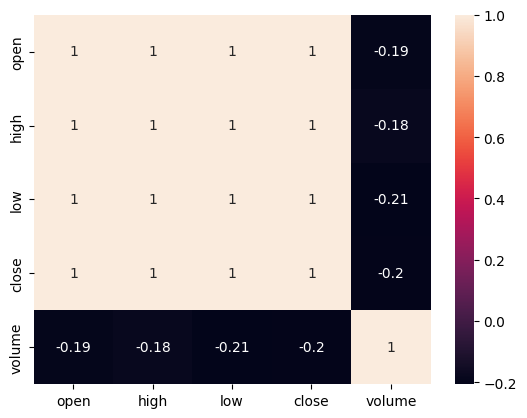

In [22]:
import seaborn as sns 
hmt=sns.heatmap(dataset2.corr(),annot=True)

In [23]:
x = dataset2[['open', 'high', 'low', 'volume']]
y = dataset2['close']

In [24]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x ,y , random_state = 0)

In [25]:

print(X_train.shape)
print(X_test.shape)

(944, 4)
(315, 4)


In [28]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.intercept_)
print(lr.coef_)
y_pred=lr.predict(X_test)
print(y_pred)

0.07732344883214637
[-6.29123466e-01  8.31589919e-01  7.96950545e-01 -2.22466661e-08]
[42.82577933 39.07860433 42.91057321 48.37157782 51.11354989 43.05755234
 55.91417365 41.75811563 57.92355231 42.54381496 39.82841701 39.72948685
 48.04531184 41.83431556 37.32322712 44.89646382 47.20482219 65.95786665
 44.02538922 74.15581338 45.192882   46.16782384 40.78498108 38.95099991
 65.99435262 55.13777352 45.51465117 52.61969463 42.75538981 40.50214686
 51.28824442 41.15817757 58.90998937 43.1588094  47.00136381 40.991382
 41.80278999 38.69492302 39.55740447 54.50335271 58.89221125 39.06433417
 51.72585965 68.11062403 47.02343391 44.59064277 39.69384355 40.81747082
 46.57019163 35.36516833 44.1786557  59.62213545 63.84927413 41.35981431
 36.36535303 59.00931807 42.11871724 61.14663069 41.47625354 49.14677346
 54.94415944 40.05991356 58.80972406 41.87216636 57.90147173 47.07143865
 45.52316799 41.76767429 53.03430661 59.94650862 51.74865864 50.74715498
 44.47339805 41.47123253 47.10721228 40.

In [29]:
dframe=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [31]:
dframe

,Actual,Predicted
5,42.25,42.825779
494,38.75,39.078604
52,42.73,42.910573
986,48.14,48.371578
186,51.21,51.113550
...,...,...
1056,53.13,52.969163
1010,50.52,50.691769
737,36.86,37.108158
459,42.27,42.509927


<Axes: >

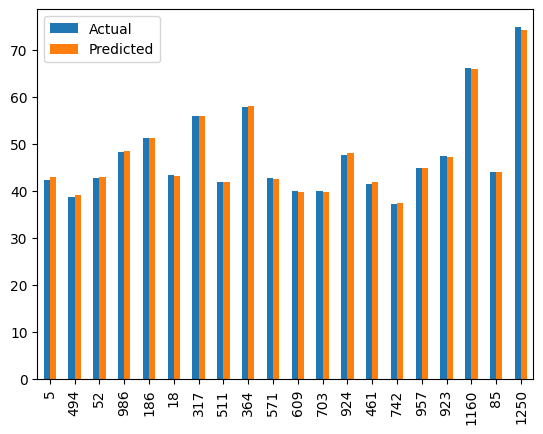

In [33]:
graph=dframe.head(20)
graph.plot.bar()

In [ ]:


#acuracy score remainign